In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("1977.xlsx")
df

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,1977,17880,313,42,3545
1,1977,17854,165,29,3498
2,1977,17987,262,24,3533
3,1977,17845,318,30,3549
4,1977,18007,262,22,3549
...,...,...,...,...,...
1858,1977,17252,385,38,3536
1859,1977,17911,111,35,3529
1860,1977,17649,9,39,3511
1861,1977,17694,84,17,3530


In [3]:
print("Shape of dataframe df: {}".format(df.shape))

Shape of dataframe df: (1863, 5)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863 entries, 0 to 1862
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year                 1863 non-null   int64
 1   Maximum length (m))  1863 non-null   int64
 2   Recession(m),        1863 non-null   int64
 3   Rate/yr(m)           1863 non-null   int64
 4   Snout altitude (m)   1863 non-null   int64
dtypes: int64(5)
memory usage: 72.9 KB


In [5]:
categorical = [col for col in df.columns if df[col].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 0 categorical variables


In [6]:
print('Number of unique Model Names: ', len(df['Snout altitude (m)'].unique()))
print('Number  of instances of models: ', len(df))

Number of unique Model Names:  72
Number  of instances of models:  1863


In [7]:
numerical = [col for col in df.columns if df[col].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 5 numerical variables


In [8]:
print(numerical)

['Year', 'Maximum length (m))', 'Recession(m),', 'Rate/yr(m)', 'Snout altitude (m)']


In [9]:
df[numerical].head()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,1977,17880,313,42,3545
1,1977,17854,165,29,3498
2,1977,17987,262,24,3533
3,1977,17845,318,30,3549
4,1977,18007,262,22,3549


In [10]:
pd.options.display.float_format = '{:,.4f}'.format
corr_matrix = df.corr()
corr_matrix

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
Year,NaN,NaN,NaN,NaN,NaN
Maximum length (m)),NaN,1.0000,-0.0154,0.0144,-0.0212
"Recession(m),",NaN,-0.0154,1.0000,0.0038,0.0085
Rate/yr(m),NaN,0.0144,0.0038,1.0000,-0.0157
Snout altitude (m),NaN,-0.0212,0.0085,-0.0157,1.0000


In [11]:
corr_matrix['Maximum length (m))'].sort_values(ascending=False)

Maximum length (m))    1.0000
Rate/yr(m)             0.0144
Recession(m),         -0.0154
Snout altitude (m)    -0.0212
Year                      NaN
Name: Maximum length (m)), dtype: float64

In [12]:
df.isnull().sum()

Year                   0
Maximum length (m))    0
Recession(m),          0
Rate/yr(m)             0
Snout altitude (m)     0
dtype: int64

In [13]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    print(df[var].value_counts() / np.float(len(df)))
    print()

Year
1977   1.0000
Name: count, dtype: float64

Recession(m),
231   0.0054
133   0.0054
281   0.0054
21    0.0048
350   0.0048
       ...  
140   0.0005
53    0.0005
210   0.0005
75    0.0005
250   0.0005
Name: count, Length: 435, dtype: float64

Rate/yr(m)
19   0.0424
30   0.0419
29   0.0392
21   0.0365
27   0.0365
32   0.0365
40   0.0365
14   0.0360
16   0.0360
39   0.0360
35   0.0354
17   0.0354
36   0.0349
38   0.0338
25   0.0327
37   0.0322
42   0.0322
41   0.0322
28   0.0317
31   0.0311
18   0.0306
24   0.0306
20   0.0301
26   0.0301
33   0.0301
13   0.0284
22   0.0284
15   0.0284
23   0.0284
34   0.0258
Name: count, dtype: float64

Snout altitude (m)
3561   0.0193
3543   0.0188
3524   0.0188
3539   0.0177
3530   0.0172
        ...  
3520   0.0107
3531   0.0091
3562   0.0081
3510   0.0075
3496   0.0016
Name: count, Length: 72, dtype: float64



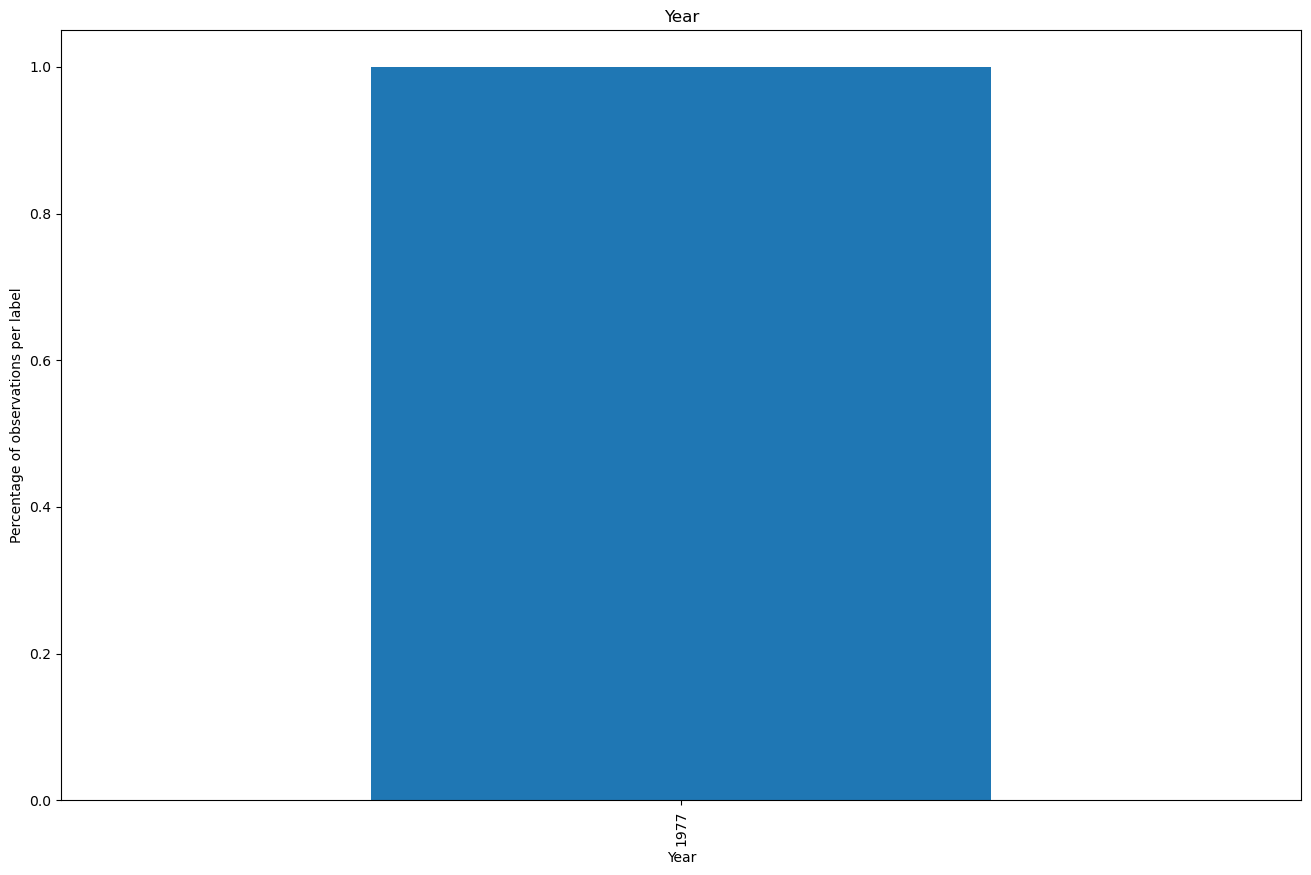

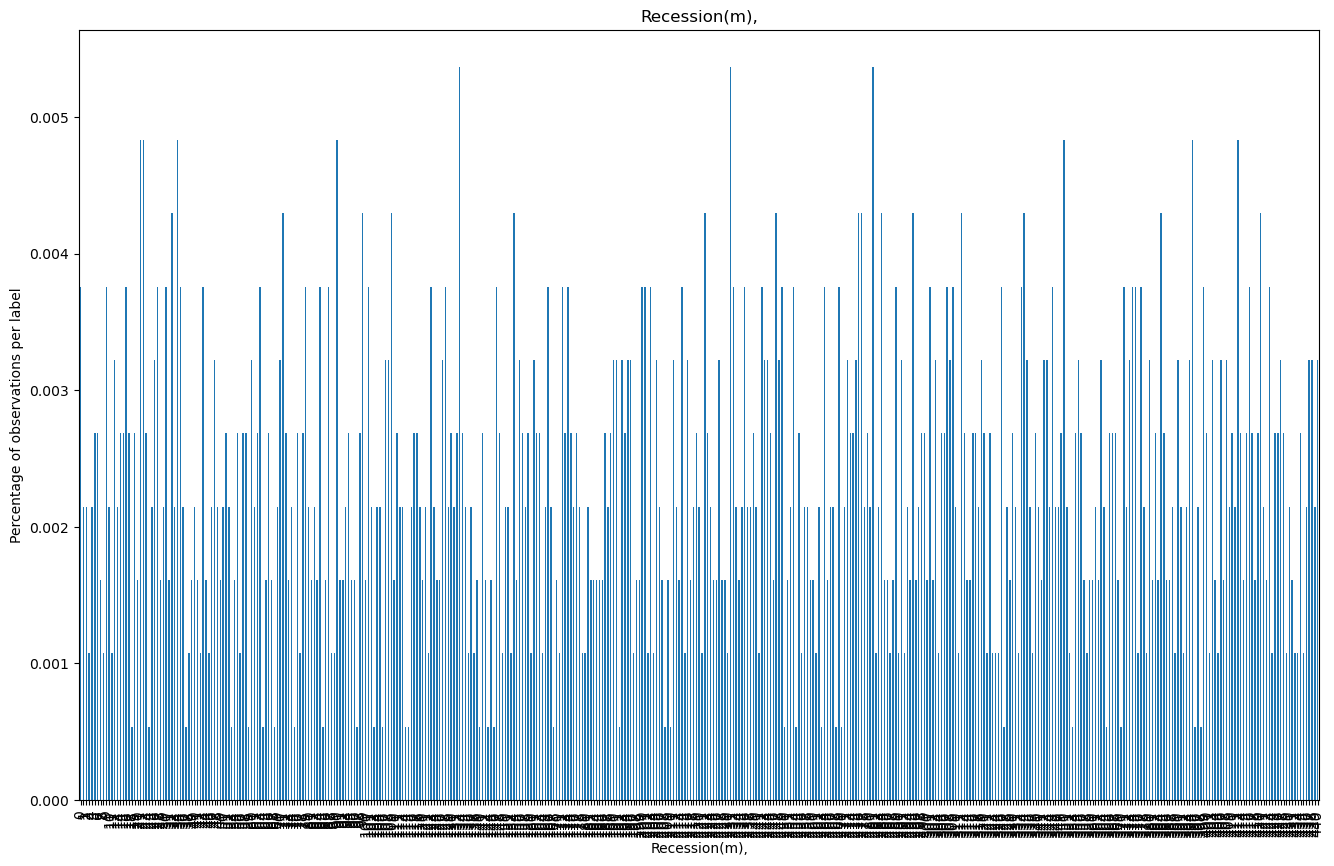

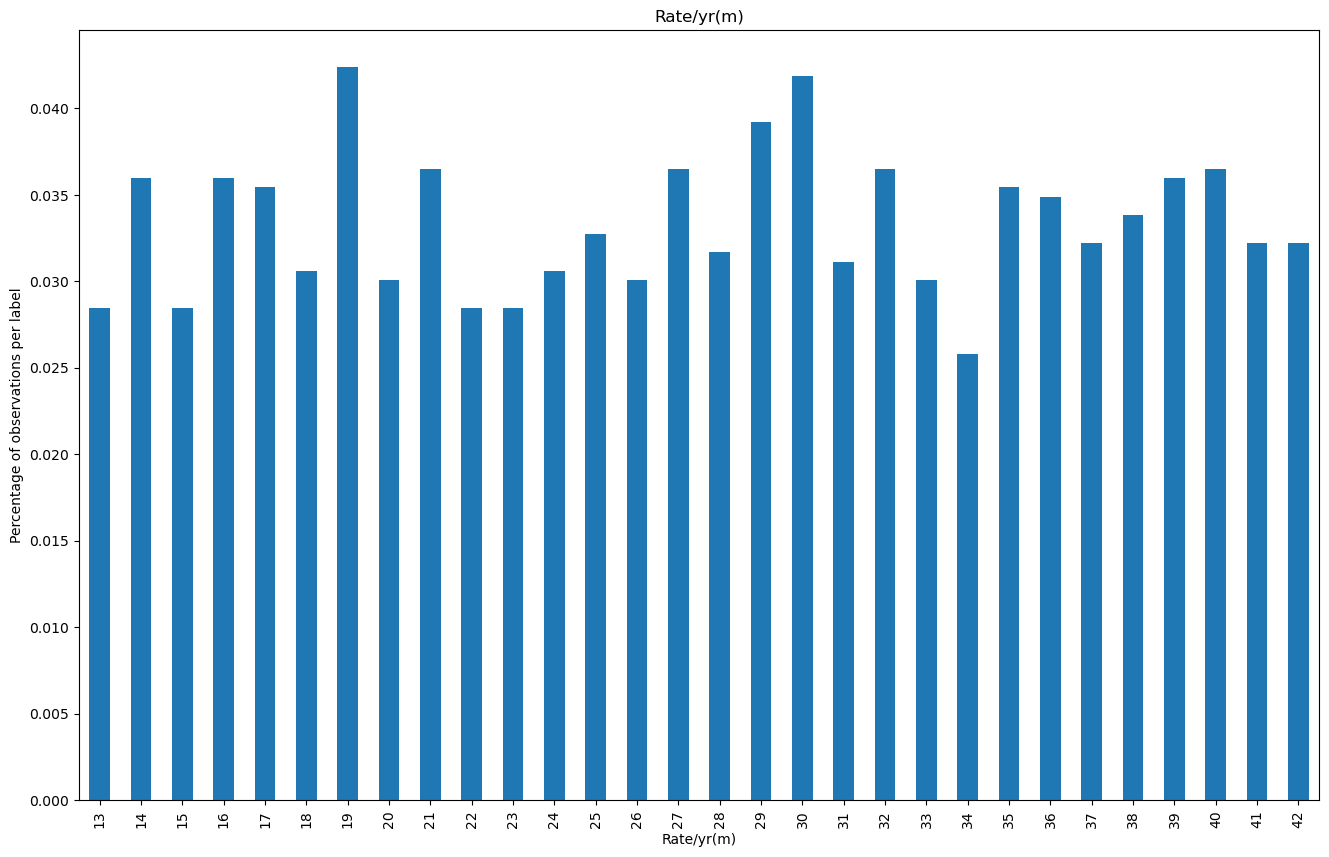

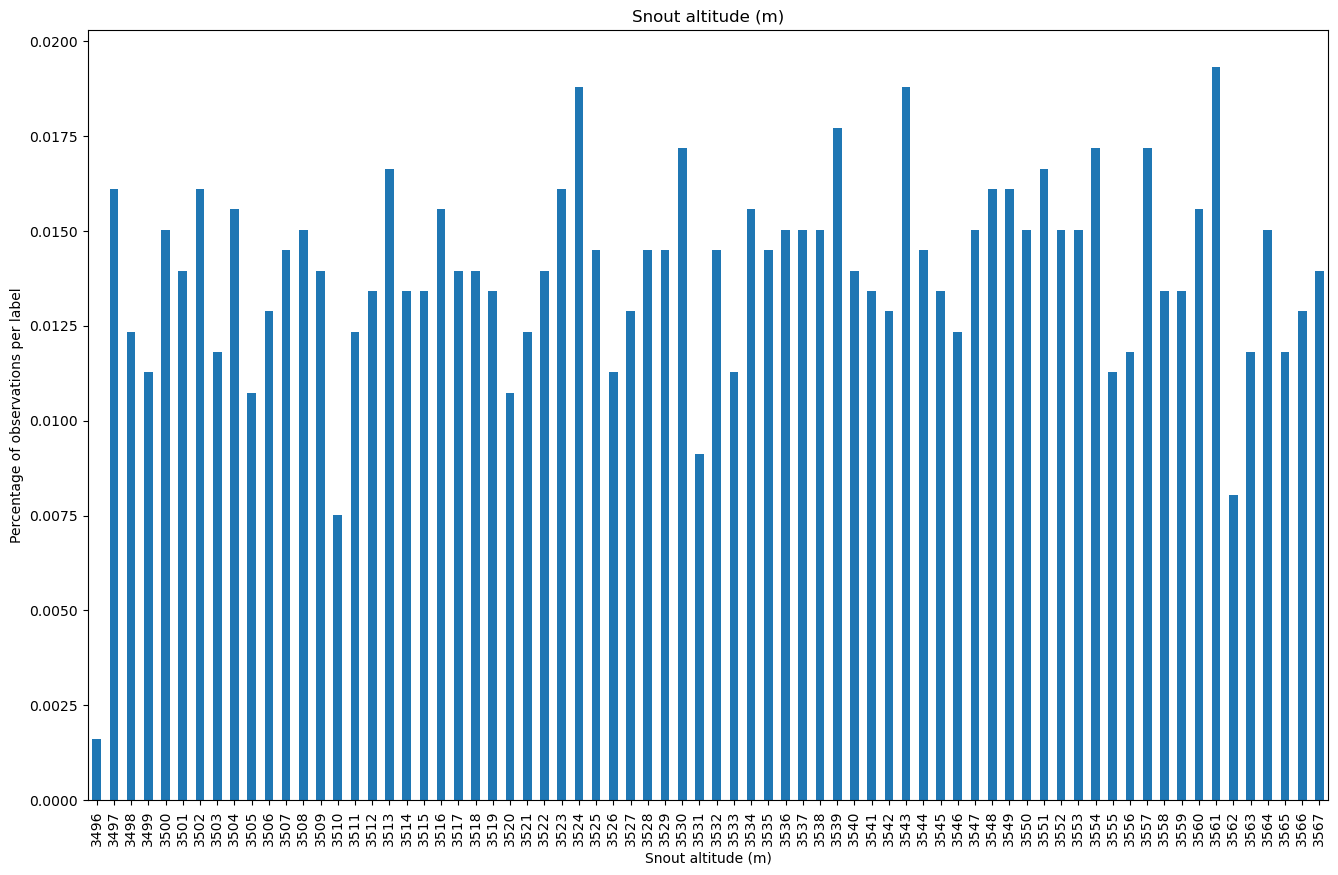

In [14]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    plt.figure(figsize=(16,10))
    (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()